In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse
import ephem
import datetime
import time

vn = np.array([0,-1])

In [2]:
idx = 16
eidx = [
    0,0,0,0,0,
    1,1,1,1,1,
    2,2,2,2,2,
    3,3,3,3,3,
    4,4,4,4,4,
    5,5,5,5,5,
    6,6,6,6,6,
    7,7,7,7,7,
    8,8,8,8,8,
    9,9,9,9,9,
][idx]
inputs = [
    "capture1_1.jpg", "capture1_2.jpg", "capture1_3.jpg", "capture1_4.jpg", "capture1_5.jpg",
    "capture3_1.jpg", "capture3_2.jpg", "capture3_3.jpg", "capture3_4.jpg", "capture3_5.jpg",
    "capture4_2.jpg", "capture4_3.jpg", "capture4_4.jpg", "capture4_5.jpg", "capture4_7.jpg",
    "capture5_6.jpg", "capture5_7.jpg", "capture5_8.jpg", "capture5_9.jpg", "capture5_10.jpg",
    "capture7_11.jpg", "capture7_12.jpg", "capture7_13.jpg", "capture7_14.jpg", "capture7_15.jpg",
    "capture8_16.jpg", "capture8_17.jpg", "capture8_18.jpg", "capture8_19.jpg", "capture8_20.jpg",
    "capture9_22.jpg", "capture9_23.jpg", "capture9_24.jpg", "capture9_25.jpg", "capture9_26.jpg",
    "capture10_27.jpg", "capture10_28.jpg", "capture10_29.jpg", "capture10_30.jpg", "capture10_31.jpg",    
    "capture11_32.jpg", "capture11_33.jpg", "capture11_34.jpg", "capture11_35.jpg", "capture11_36.jpg",
    "capture12_37.jpg", "capture12_38.jpg", "capture12_39.jpg", "capture12_40.jpg","capture12_41.jpg",
]
img = plt.imread("images/" + inputs[idx])
# Each set start with North Tower, go clockwise

ellipse_points = [
    np.array([
        (587,900), (615,832), (1147,601), (1215,626), (1467,1151),(1444,1219), (893,1472), (832,1447)
    ]),
    np.array([
        (1395,1303), (1347,1359), (739,1392), (684,1341), (665,755), (714,704), (1295,673),(1349,720)
    ]),
    np.array([
        (1445,859), (1468,925), (1198,1456), (1127,1478), (592,1193), (573,1122), (858,616), (926,596),
    ]),
    np.array([
        (611,848), (645,789), (1200,628), (1264,659), (1450,1207),(1419,1270), (835,1451),
    ]),
    np.array([
        (834,627), (901,604), (1432,835), (1461,900), (1225,1444), (1155,1471), (602,1217), (579,1148),
    ]),
    np.array([
        (956,1485), (883,1468), (571,960),  (590,890), (1087,589), (1155, 605), (1479,1086), (1465,1159),
    ]),
    np.array([
        (668,1324), (624,1262), (733,692), (791,651), (1363,738), (1407,793), (1271,1417),
    ]),
    np.array([
        (710,713), (766,669), (1342,718), (1389,769), (1352,1352), (1297,1401), (689,1347), (643,1291),
    ]),
    np.array([
        (1287,671), (1342,716), (1399,1297), (1354, 1351), (744, 1396), (689,1347), (661,763), (710, 711),
    ]),
    np.array([
        (1432,1247), (1391, 1310), (790, 1428), (729, 1385), (631, 806), (674, 749), (1241, 645), (1302, 681),
    ])
]
x = ellipse_points[eidx][:,0]
y = ellipse_points[eidx][:,1]

xs_0, xs_1 = [
    (x[0], 1112), (x[1], 1279), (x[1], 1148), (x[0], 786), (x[1], 833),
    (x[0], 661), (x[0], 631), (x[0], 893), (x[0], 1153), (x[1], 1485),
    (x[0], 837), (x[0], 1160), (x[0], 1329), (x[1], 948), (x[0], 789),
    (x[0], 1118), (x[0], 1467), (x[1], 400), (x[1], 669), (x[1], 925),
    (x[1], 785), (x[0], 1507), (x[1], 789), (x[0], 1135), (x[0], 1430),
    (x[0], 544), (x[1], 1323), (x[1], 1034), (x[1], 1397), (x[0], 525),
    (x[1], 1159), (x[0], 667), (x[1], 1316), (x[1], 1050), (x[1], 1280),
    (x[0], 1499), (x[0], 1001), (x[0], 1331), (x[0], 1200), (x[0], 1473),
    (x[1], 460), (x[1], 932), (x[1],765), (x[0], 1097), (x[0], 1079),
    (x[0], 956), (x[1], 1269), (x[0], 1057), (x[1], 1508), (x[1], 1162),
][idx]
ys_0,ys_1 = [
    (y[0], 345), (y[1], 1334), (y[1], 1454), (y[0], 625), (y[1], 1363),
    (y[0], 1681), (y[0], 1039), (y[0], 1255), (y[0], 1303), (y[1], 662),
    (y[0], 1367), (y[0], 1250), (y[0], 1054), (y[1], 458), (y[0], 1441),
    (y[0], 1236), (y[0], 901), (y[1], 1473), (y[1], 1558), (y[1], 1190),
    (y[1], 1090), (y[0], 560), (y[1], 1361), (y[0], 898), (y[0], 839),
    (y[0], 1234), (y[1], 938), (y[1], 1208), (y[1],1153), (y[0], 952),
    (y[1], 611), (y[0], 611), (y[1], 1003), (y[1], 1268), (y[1], 1408),
    (y[0], 480), (y[0], 821), (y[0], 828), (y[0], 861), (y[0], 1024),
    (y[1], 1055), (y[1], 815), (y[1], 620), (y[0], 1036), (y[0], 1009),
    (y[0], 1160), (y[1], 751), (y[0], 1620), (y[1], 753), (y[1], 626),
][idx]

vs_c = np.array([
    xs_1 - xs_0, 
    ys_1 - ys_0
])
vs_c = vs_c / np.linalg.norm(vs_c)
print("Camera Shadow Vector:", vs_c)

vnx_0,vny_0 = x[5],y[5]
vnx_1,vny_1 = x[0],y[0]
vn_c = np.array([
    vnx_1-vnx_0,
    vny_1-vny_0
])
vn_c = vn_c / np.linalg.norm(vn_c)
print("Camera North Vector:", vn_c)

Camera Shadow Vector: [0.9980887  0.06179755]
Camera North Vector: [-0.88638916 -0.46294087]


458.2576992791558 448.9851453996268
center =  (1023.9985774885189, 1042.0004349419085)
angle of rotation =  0.22139391634501898
axes =  (458.2576992791558, 448.9851453996268)


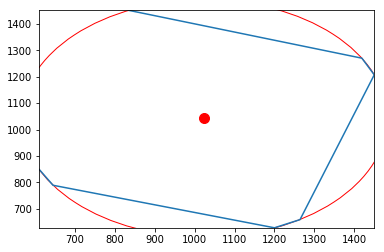

In [3]:
ell = EllipseModel()
if not ell.estimate(ellipse_points[eidx]):
    print("Estimate Failed")
else:
    xc, yc, a, b, theta = ell.params
    print(a,b)
    print("center = ",  (xc, yc))
    print("angle of rotation = ",  np.degrees(theta))
    print("axes = ", (a,b))

    fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)

    axs.plot(x, y)
    axs.scatter(xc, yc, color='red', s=100)
    axs.set_xlim(x.min(), x.max())
    axs.set_ylim(y.min(), y.max())

    ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor='red', facecolor='none')

    axs.add_patch(ell_patch)
    plt.show()

In [4]:
camera_a = np.arccos(np.dot(vn,vn_c))
if vn[0]*vn_c[1] - vn[1]*vn_c[0] < 0:
    camera_a = -camera_a
if a > b:
    camera_e = np.arcsin(b/a)
else:
    camera_e = np.arcsin(a/b)
light_a = np.arccos(np.dot(vs_c, vn_c))
if vs_c[1]*vn_c[0] - vs_c[0]*vn_c[1] < 0:
    light_a = -light_a

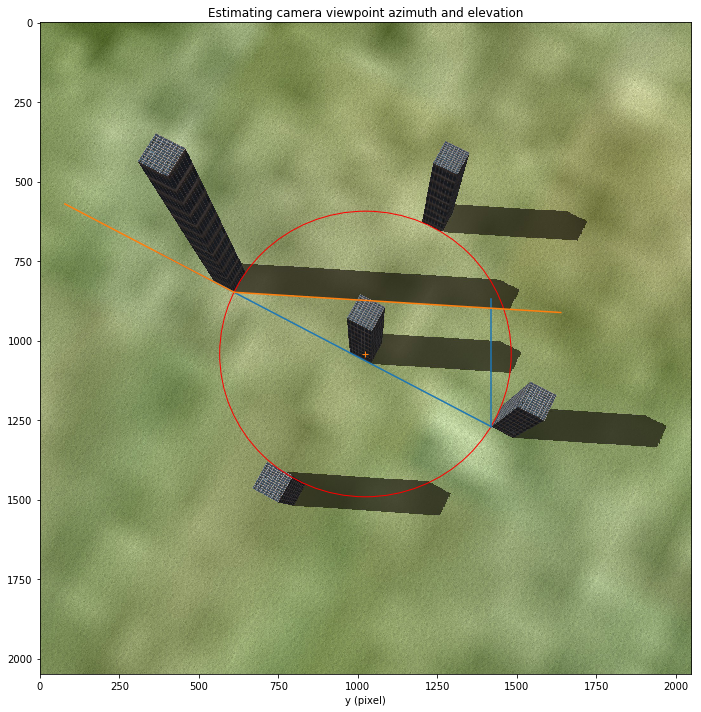

In [5]:
def linear_extrapolate(x, y, frac):
    x0, y0 = x[0], y[0]
    dx, dy = x[1]-x[0], y[1]-y[0]
    return x0+frac*dx, y0+frac*dy

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the image
ax.imshow(img, aspect=1)

# Plot the ellipse that matches the launch platform
ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor='red', facecolor='none')
ax.add_patch(ell_patch)

ax.plot(xc, yc, "C1+")


xc, yc = linear_extrapolate(np.array([vnx_0,vnx_1]), 
                            np.array([vny_0,vny_1]), 
                            np.array([0,1.3]))
ax.plot(xc, yc, "C0")

xn, yn = linear_extrapolate(np.array([vnx_0,vnx_0]), 
                            np.array([vny_0,-100+vny_0]), 
                            np.array([0,4]))
ax.plot(xn, yn, "C0")

# Plot the shadow of the North tower and extrapolate
#ax.plot(x_north_shadow, y_north_shadow, "C1o")
xs, ys = linear_extrapolate(np.array([xs_0,xs_1]), 
                            np.array([ys_0,ys_1]), 
                            np.array([0,1.2]))
ax.plot(xs, ys, "C1")

xsn, ysn = linear_extrapolate(np.array([xs_0,300*vn_c[0] + xs_0]), 
                            np.array([ys_0,300*vn_c[1] + ys_0]), 
                            np.array([0,2]))
ax.plot(xsn, ysn, "C1")


ax.set_title("Estimating camera viewpoint azimuth and elevation")
ax.set_xlabel("x (pixel)")
ax.set_xlabel("y (pixel)")

plt.tight_layout()
plt.savefig("image_analysis.png", bbox_inches="tight")

In [6]:
print("Azimuth of Light: %.1f" % np.degrees(light_a))
print("Azimuth of camera: %.1f deg" % np.degrees(camera_a))
print("Elevation of camera: %.1f deg" % np.degrees(camera_e))

Azimuth of Light: 156.0
Azimuth of camera: -62.4 deg
Elevation of camera: 78.5 deg
